<a href="https://colab.research.google.com/github/dungmike96/Python/blob/main/PT_doanh_s%E1%BB%91_b%C3%A1n_h%C3%A0ng_GM_Corp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.DATA IMPORT

In [ ]:
#Import 1 số thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Check file có gì
import os
# Hiển thị danh sách tệp và thư mục trong Google Drive
drive_path = '/content/drive/My Drive/Data set'
for root, dirs, files in os.walk(drive_path):
    for name in files:
        print(os.path.join(root, name))

/content/drive/My Drive/Data set/diem_thi_thpt_2024.csv
/content/drive/My Drive/Data set/diem_thi_thpt_2023.csv
/content/drive/My Drive/Data set/diem_thi_thpt_2022.csv
/content/drive/My Drive/Data set/diem_thi_2020_2021.csv
/content/drive/My Drive/Data set/GM CORP.xlsx
/content/drive/My Drive/Data set/Đơn bán hàng Real time.xlsx


In [ ]:
df_gm = pd.read_excel('/content/drive/My Drive/Data set/GM CORP.xlsx')

In [ ]:
# Điều chỉnh cài đặt hiển thị của Pandas để không hiển thị ký hiệu khoa học
pd.set_option('display.float_format', '{:.2f}'.format)
df_gm.head()

,Mã đơn hàng,Ngày tạo,Khách hàng,PD,Ngày KH yêu cầu,Nhân viên kinh doanh,Tiếp nhận YC làm mẫu,Hoạt động,Công ty,Tổng,Trạng thái,Lý do hủy
0,S03031,2024-08-09 11:01:55,THAGACO INTERNATIONAL INVESTMENT JOINT STOCK COMPANY,Victoria,2024-02-26,Hương,False,Đơn hàng đã hoàn thành khảo sát giá,GM CORP JOINT STOCK COMPANY,1376011200.00,Đã có giá,NaN
1,S03261,2024-09-10 09:19:19,TMC LIMITED,Nils,2024-09-10,Ryan Luong,False,Đơn hàng đã hoàn thành khảo sát giá,GM CORP JOINT STOCK COMPANY,NaN,Đang khảo sát giá,NaN
2,S03262,2024-09-10 09:20:40,MIAN APPAREL COMPANY,Ashley,2024-09-10,Ashley,False,Đơn hàng đã hoàn thành khảo sát giá,GM CORP JOINT STOCK COMPANY,NaN,Báo giá,NaN
3,S03260,2024-09-10 09:08:08,CÔNG TY SCAVI BIÊN HÒA,Nils,2024-09-10,Ryan Luong,False,Đơn hàng đã hoàn thành khảo sát giá,GM CORP JOINT STOCK COMPANY,NaN,Đang khảo sát giá,NaN
4,S03259,2024-09-10 08:18:11,GMAA,Nils,2024-05-16,Le Thu,False,Đơn hàng đã hoàn thành khảo sát giá,GM CORP JOINT STOCK COMPANY,5734800.00,Báo giá,NaN


2.DATA CLEANING

In [ ]:
df_gm.sort_values(by='Ngày tạo',ascending =True).head(5)

,Mã đơn hàng,Ngày tạo,Khách hàng,PD,Ngày KH yêu cầu,Nhân viên kinh doanh,Tiếp nhận YC làm mẫu,Hoạt động,Công ty,Tổng,Trạng thái,Lý do hủy
3121,S00010,2023-01-06 17:16:33,CÔNG TY TNHH DỆT LÝ MINH,Huong Do,2022-11-29,Hương,False,Đơn hàng đã hoàn thành khảo sát giá,GM CORP JOINT STOCK COMPANY,NaN,Đã hủy,Thao tác sai
3122,S00011,2023-01-06 17:16:56,CÔNG TY TNHH DỆT LÝ MINH,Huong Do,2022-11-29,Hương,False,Đơn hàng đã hoàn thành khảo sát giá,GM CORP JOINT STOCK COMPANY,8000000.00,Đã hủy,Khách không phản hồi
3120,S00012,2023-01-06 17:26:03,GRACE ELEYAE,Danh Nguyen,2023-01-06,Leo Orange,False,Đơn hàng đã hoàn thành khảo sát giá,GM CORP JOINT STOCK COMPANY,106968.40,Đã có giá,NaN
3119,S00013,2023-01-06 17:51:29,CÔNG TY TNHH THƯƠNG MẠI VÀ CƠ KHÍ LINH PHONG - LIPHOCO,Tai Nguyen,2022-09-16,Hương,False,Đơn hàng đã hoàn thành khảo sát giá,GM CORP JOINT STOCK COMPANY,32263000.00,Đã hủy,Giá cao
3118,S00024,2023-01-09 14:13:38,CÔNG TY TNHH DỆT LÝ MINH,Huong Do,2023-01-17,Ryan Luong,False,Đơn hàng đã hoàn thành khảo sát giá,GM CORP JOINT STOCK COMPANY,8000000.00,PI,NaN


In [ ]:
df_gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Mã đơn hàng           3123 non-null   object        
 1   Ngày tạo              3123 non-null   datetime64[ns]
 2   Khách hàng            3123 non-null   object        
 3   PD                    3123 non-null   object        
 4   Ngày KH yêu cầu       3123 non-null   datetime64[ns]
 5   Nhân viên kinh doanh  3123 non-null   object        
 6   Tiếp nhận YC làm mẫu  3123 non-null   bool          
 7   Hoạt động             2965 non-null   object        
 8   Công ty               3123 non-null   object        
 9   Tổng                  2938 non-null   float64       
 10  Trạng thái            3123 non-null   object        
 11  Lý do hủy             213 non-null    object        
dtypes: bool(1), datetime64[ns](2), float64(1), object(8)
memory usage: 271.6+ KB

In [ ]:
df_gm.describe()

,Ngày tạo,Ngày KH yêu cầu,Tổng
count,3123,3123,2938.00
mean,2023-12-19 10:04:30.886327296,2023-11-22 07:48:00.691642880,430573723.63
min,2023-01-06 17:16:33,2022-09-16 00:00:00,0.01
25%,2023-08-01 15:54:25.500000,2023-06-30 00:00:00,67945.50
50%,2023-12-27 10:43:38,2023-11-13 00:00:00,4888620.00
75%,2024-05-20 15:37:04.500000,2024-05-04 12:00:00,38654750.00
max,2024-09-10 09:20:40,2024-09-30 00:00:00,210822136800.00
std,NaN,NaN,6699915205.19


In [ ]:
df_gm1 = df_gm.drop(columns=['Công ty','Lý do hủy'])
df_gm1.dropna()

,Mã đơn hàng,Ngày tạo,Khách hàng,PD,Ngày KH yêu cầu,Nhân viên kinh doanh,Tiếp nhận YC làm mẫu,Hoạt động,Tổng,Trạng thái
0,S03031,2024-08-09 11:01:55,THAGACO INTERNATIONAL INVESTMENT JOINT STOCK COMPANY,Victoria,2024-02-26,Hương,False,Đơn hàng đã hoàn thành khảo sát giá,1376011200.00,Đã có giá
4,S03259,2024-09-10 08:18:11,GMAA,Nils,2024-05-16,Le Thu,False,Đơn hàng đã hoàn thành khảo sát giá,5734800.00,Báo giá
5,S03258,2024-09-09 14:21:38,CÔNG TY TNHH DELTA INDUSTRIES (VIETNAM),Le Thu,2024-09-09,Le Thu,False,Đơn hàng đã hoàn thành khảo sát giá,2035.37,Đang khảo sát giá
6,S03257,2024-09-09 13:55:37,"CÔNG TY CỔ PHẦN ARKSUN VIỆT NAM, Ms Phương",Ashley,2024-09-18,Ashley,False,Đơn hàng đã hoàn thành khảo sát giá,2298897.00,PI
7,S03256,2024-09-09 13:41:18,FRIWO VIETNAM COMPANY LIMITED,Nils,2024-09-09,Ryan Luong,False,Đơn hàng đã hoàn thành khảo sát giá,47960000.00,Báo giá
...,...,...,...,...,...,...,...,...,...,...
3117,S00026,2023-01-12 10:58:38,CÔNG TY SCAVI HUẾ,Huong Do,2023-01-19,Kenny,False,Đơn hàng đã hoàn thành khảo sát giá,540540.00,PI
3118,S00024,2023-01-09 14:13:38,CÔNG TY TNHH DỆT LÝ MINH,Huong Do,2023-01-17,Ryan Luong,False,Đơn hàng đã hoàn thành khảo sát giá,8000000.00,PI
3119,S00013,2023-01-06 17:51:29,CÔNG TY TNHH THƯƠNG MẠI VÀ CƠ KHÍ LINH PHONG - LIPHOCO,Tai Nguyen,2022-09-16,Hương,False,Đơn hàng đã hoàn thành khảo sát giá,32263000.00,Đã hủy
3120,S00012,2023-01-06 17:26:03,GRACE ELEYAE,Danh Nguyen,2023-01-06,Leo Orange,False,Đơn hàng đã hoàn thành khảo sát giá,106968.40,Đã có giá


In [ ]:
# Kiểm tra số lượng giá trị thiếu của df_gm1
missing_values = df_gm1.isna().sum()
print(f"Số lượng giá trị thiếu trong cột 'year': {missing_values}")

Số lượng giá trị thiếu trong cột 'year': Mã đơn hàng               0
Ngày tạo                  0
Khách hàng                0
PD                        0
Ngày KH yêu cầu           0
Nhân viên kinh doanh      0
Tiếp nhận YC làm mẫu      0
Hoạt động               158
Tổng                    185
Trạng thái                0
dtype: int64


In [ ]:
df_gm1.dropna(how="all",inplace=True)

In [ ]:
df_gm1['Trạng thái'] = df_gm1['Trạng thái'].fillna('Đang khảo sát')

In [ ]:
df_gm1['Tổng'] = df_gm1['Tổng'].fillna(0)

In [ ]:
df_gm1.head()

,Mã đơn hàng,Ngày tạo,Khách hàng,PD,Ngày KH yêu cầu,Nhân viên kinh doanh,Tiếp nhận YC làm mẫu,Hoạt động,Tổng,Trạng thái
0,S03031,2024-08-09 11:01:55,THAGACO INTERNATIONAL INVESTMENT JOINT STOCK COMPANY,Victoria,2024-02-26,Hương,False,Đơn hàng đã hoàn thành khảo sát giá,1376011200.00,Đã có giá
1,S03261,2024-09-10 09:19:19,TMC LIMITED,Nils,2024-09-10,Ryan Luong,False,Đơn hàng đã hoàn thành khảo sát giá,0.00,Đang khảo sát giá
2,S03262,2024-09-10 09:20:40,MIAN APPAREL COMPANY,Ashley,2024-09-10,Ashley,False,Đơn hàng đã hoàn thành khảo sát giá,0.00,Báo giá
3,S03260,2024-09-10 09:08:08,CÔNG TY SCAVI BIÊN HÒA,Nils,2024-09-10,Ryan Luong,False,Đơn hàng đã hoàn thành khảo sát giá,0.00,Đang khảo sát giá
4,S03259,2024-09-10 08:18:11,GMAA,Nils,2024-05-16,Le Thu,False,Đơn hàng đã hoàn thành khảo sát giá,5734800.00,Báo giá


In [ ]:

df_gm1['Ngày tạo'] = pd.to_datetime(df_gm1['Ngày tạo'])  # Chuyển đổi sang định dạng datetime
df_gm1['Month'] = df_gm1['Ngày tạo'].dt.to_period('M')  # Thêm cột tháng

# Đếm số lượng đơn hàng theo từng tháng
orders_per_month = df_gm1.groupby('Month').size()
print(orders_per_month)


Month
2023-01     30
2023-02     75
2023-03    115
2023-04    104
2023-05    166
2023-06    129
2023-07    153
2023-08    190
2023-09    165
2023-10    165
2023-11    159
2023-12    132
2024-01    155
2024-02    126
2024-03    206
2024-04    167
2024-05    185
2024-06    192
2024-07    216
2024-08    240
2024-09     53
Freq: M, dtype: int64


In [ ]:
df_gm1.replace({'Khách hàng': 'Địa chỉ giao hàng'}, 'CÔNG TY CỔ PHẦN SCAVIER VIỆT NAM', inplace=True)

In [ ]:
# Đảm bảo cột 'Tổng' là kiểu số, loại bỏ các giá trị không hợp lệ
df_gm1['Tổng'] = pd.to_numeric(df_gm1['Tổng'], errors='coerce')

# Thay thế các giá trị NaN bằng 0
df_gm1['Tổng'] = df_gm1['Tổng'].fillna(0)

# Tính tổng giá trị đơn hàng theo từng khách hàng
revenue_by_customer = df_gm1.groupby('Khách hàng')['Tổng'].sum()

# Hiển thị kết quả
print(revenue_by_customer)


Khách hàng
28 Hung Phu Joint Stock Company                                51942033.00
AGRIFOOD DEVELOPMENT AND INVESTMENT COMPANY LIMITED          2908028628.00
ALPINE CREATIONS VIETNAM CO., LTD                             816966556.43
ANH HOÀNG                                                     269125200.00
ANH MICHAEL - KHÁCH HÀNG PHÁP                                     22032.00
                                                                  ...     
WINSENDA (HONGKONG) CO.LIMITED                                        0.00
WORLD CAT VIET NAM SOURCING & DEVELOPMENT SERVICES CO.,LTD   1049328000.00
Y2010                                                                 0.00
YFYJUPITER                                                            0.00
kim sora                                                       40384200.00
Name: Tổng, Length: 385, dtype: float64


In [ ]:
# Đếm số lượng đơn hàng và tổng doanh thu theo nhân viên kinh doanh
performance_by_salesperson = df_gm1.groupby('Nhân viên kinh doanh').agg(
    number_of_orders=('Mã đơn hàng', 'count'),
    total_revenue=('Tổng', 'sum')
)
print(performance_by_salesperson)


                      number_of_orders   total_revenue
Nhân viên kinh doanh                                  
Alice                               22  14733415356.00
Ashley                             246   7659906140.99
Danh Nguyen                        135  21118325371.50
Emily                               10     15973220.00
Emma - Prepress                     92  31238132816.97
Emmy                                31  17348822985.07
Flora                               15    704065435.56
Hoa Trương                           5   1450330456.00
Hương                              454 152507922423.05
Jennifer                           261  13129507751.25
Kenny                              810 236613011986.35
Le Thu                              79  17757097253.16
Leo Orange                          19    251280553.89
Nguyen Lira                          1     11802564.00
Nils                                30  23362251033.75
PD GM                               47  28325766751.56
Phuoc Pham

In [ ]:
# Lọc dữ liệu với điều kiện Trạng thái = "PI"
filtered_data = df_gm1[(df_gm1['Trạng thái'] == 'PI') & (df_gm1['Ngày tạo'].dt.year == 2024)]

# Đếm số lượng đơn hàng và tổng doanh thu theo nhân viên kinh doanh từ dữ liệu đã lọc
performance_by_salesperson = filtered_data.groupby('Nhân viên kinh doanh').agg(
    number_of_orders=('Mã đơn hàng', 'count'),
    total_revenue=('Tổng', 'sum')
)

# Chuyển đổi đơn vị total_revenue sang Billion (Tỷ)
performance_by_salesperson['total_revenue_billion'] = performance_by_salesperson['total_revenue'] / 1e9

print(performance_by_salesperson)



                      number_of_orders  total_revenue  total_revenue_billion
Nhân viên kinh doanh                                                        
Ashley                              47  2102727168.81                   2.10
Danh Nguyen                         29  1259277180.13                   1.26
Emma - Prepress                      4   149195602.00                   0.15
Emmy                                 3    25239600.00                   0.03
Flora                                1    25389000.00                   0.03
Jennifer                            91  2196369355.00                   2.20
Kenny                              183  6773810555.89                   6.77
Le Thu                               1     5741172.00                   0.01
PD GM                                2    17043912.00                   0.02
Phuoc Pham                           3    24072653.00                   0.02
Rio Dinh                            13    76077638.76                   0.08

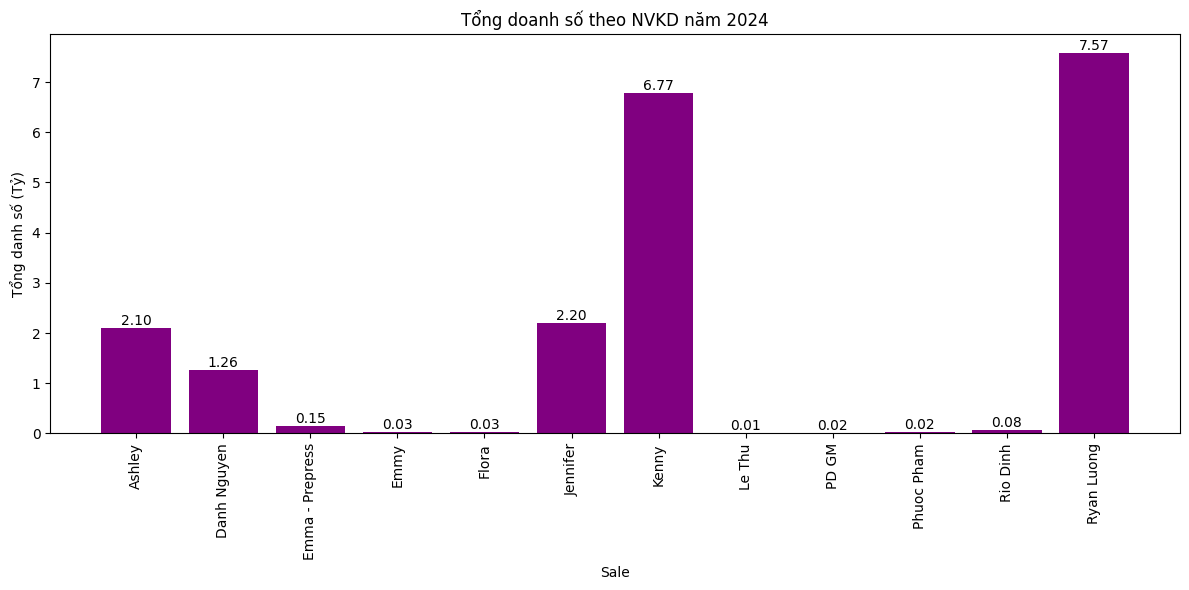

In [ ]:

# Trực quan hóa với bar chart (doanh thu theo nhân viên)
plt.figure(figsize=(12, 6))
# Accessing 'Nhân viên kinh doanh' and 'total_revenue' using the index
bars = plt.bar(performance_by_salesperson.index, performance_by_salesperson["total_revenue_billion"], color="purple")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=90)
plt.title("Tổng doanh số theo NVKD năm 2024")
plt.ylabel("Tổng danh số (Tỷ)")
plt.xlabel("Sale")

plt.tight_layout()
plt.show()

In [ ]:
# Đếm số lượng từng trạng thái đơn hàng
status_counts = df_gm1['Trạng thái'].value_counts(normalize=True) * 100
print(status_counts)


Trạng thái
PI                  40.38
Đã có giá           18.32
Đang khảo sát giá   18.12
Báo giá             12.81
Đã hủy               5.51
Đơn hàng             4.71
Báo giá đã gửi       0.16
Name: proportion, dtype: float64


In [ ]:
# Chuyển đổi 'Ngày KH yêu cầu' sang định dạng datetime
df_gm1['Ngày KH yêu cầu'] = pd.to_datetime(df_gm1['Ngày KH yêu cầu'])
df_gm1['Thời gian xử lý (ngày)'] = (df_gm1['Ngày KH yêu cầu'] - df_gm1['Ngày tạo']).dt.days  # Tính độ trễ theo ngày

print(df_gm1[['Mã đơn hàng', 'Ngày KH yêu cầu', 'Ngày tạo', 'Thời gian xử lý (ngày)']])


     Mã đơn hàng Ngày KH yêu cầu            Ngày tạo  Thời gian xử lý (ngày)
0         S03031      2024-02-26 2024-08-09 11:01:55                    -166
1         S03261      2024-09-10 2024-09-10 09:19:19                      -1
2         S03262      2024-09-10 2024-09-10 09:20:40                      -1
3         S03260      2024-09-10 2024-09-10 09:08:08                      -1
4         S03259      2024-05-16 2024-09-10 08:18:11                    -118
...          ...             ...                 ...                     ...
3118      S00024      2023-01-17 2023-01-09 14:13:38                       7
3119      S00013      2022-09-16 2023-01-06 17:51:29                    -113
3120      S00012      2023-01-06 2023-01-06 17:26:03                      -1
3121      S00010      2022-11-29 2023-01-06 17:16:33                     -39
3122      S00011      2022-11-29 2023-01-06 17:16:56                     -39

[3123 rows x 4 columns]


In [ ]:
# Đếm số lượng yêu cầu làm mẫu
sample_requests = df_gm1['Tiếp nhận YC làm mẫu'].value_counts()
print(sample_requests)


Tiếp nhận YC làm mẫu
False    2874
True      249
Name: count, dtype: int64


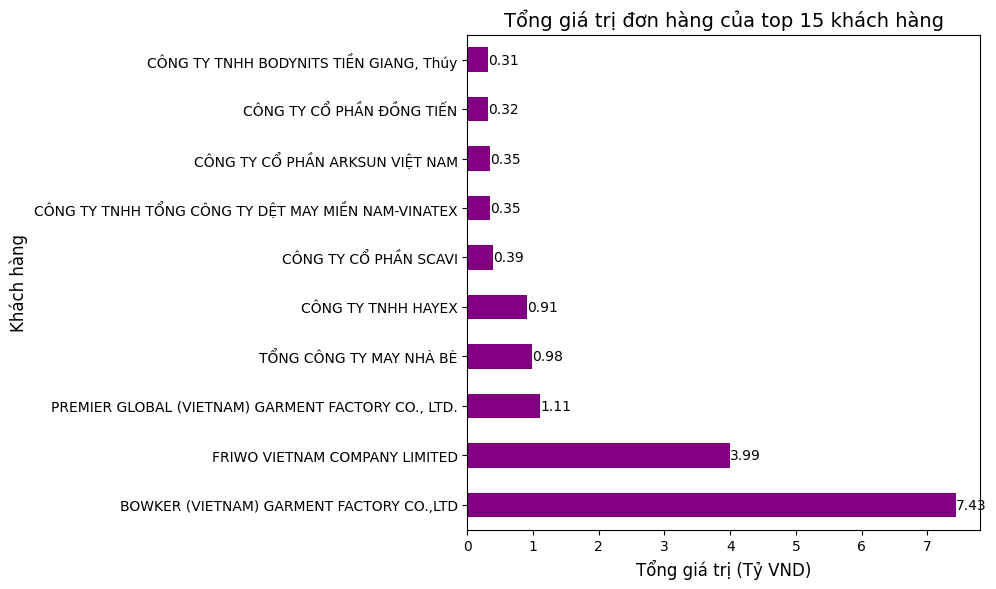

In [ ]:
filtered_data1 = df_gm1[(df_gm1['Trạng thái'] == 'PI') & (df_gm1['Ngày tạo'].dt.year == 2024)]
# Dữ liệu tổng giá trị đơn hàng theo từng khách hàng
revenue_by_customer = filtered_data1.groupby('Khách hàng')['Tổng'].sum()/1e9
# Sort by the 'Tổng' column after grouping and summing
revenue_by_customer = revenue_by_customer.sort_values(ascending=False).head(10)

# Vẽ biểu đồ cột ngang cho top 15 khách hàng
plt.figure(figsize=(10, 6))
bars = revenue_by_customer.plot(kind='barh', color='purple')

# Add text labels to the bars
for index, value in enumerate(revenue_by_customer):
    bars.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10)

# Thêm tiêu đề và nhãn
plt.title('Tổng giá trị đơn hàng của top 15 khách hàng', fontsize=14)
plt.xlabel('Tổng giá trị (Tỷ VND)', fontsize=12)
plt.ylabel('Khách hàng', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
df_gm1.describe()

,Ngày tạo,Ngày KH yêu cầu,Tổng
count,3123,3123,3123.00
mean,2023-12-19 10:04:30.886327296,2023-11-22 07:48:00.691642880,405067435.17
min,2023-01-06 17:16:33,2022-09-16 00:00:00,0.00
25%,2023-08-01 15:54:25.500000,2023-06-30 00:00:00,12379.36
50%,2023-12-27 10:43:38,2023-11-13 00:00:00,3471120.00
75%,2024-05-20 15:37:04.500000,2024-05-04 12:00:00,33500466.00
max,2024-09-10 09:20:40,2024-09-30 00:00:00,210822136800.00
std,NaN,NaN,6499171064.31


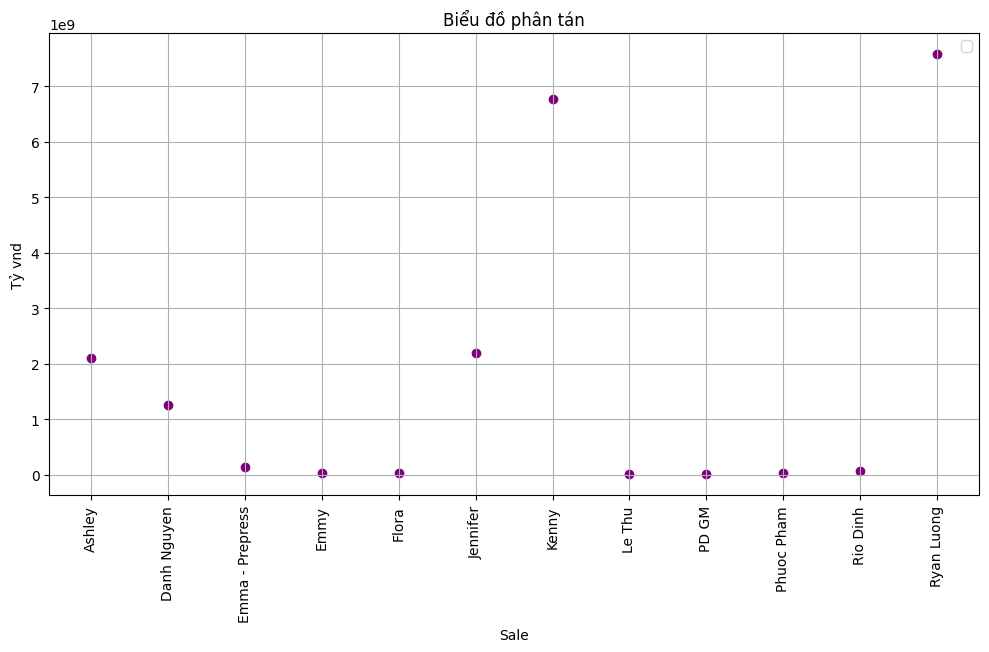

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.scatter(performance_by_salesperson.index, performance_by_salesperson["total_revenue"], color="purple")
plt.xticks(rotation=90)
plt.title('Biểu đồ phân tán')
plt.xlabel('Sale')
plt.ylabel('Tỷ vnd')
plt.legend()
plt.grid(True)

# Hiển thị
plt.show()


In [ ]:
df_gm1.head()

,Mã đơn hàng,Ngày tạo,Khách hàng,PD,Ngày KH yêu cầu,Nhân viên kinh doanh,Tiếp nhận YC làm mẫu,Hoạt động,Tổng,Trạng thái,Month
0,S03031,2024-08-09 11:01:55,THAGACO INTERNATIONAL INVESTMENT JOINT STOCK COMPANY,Victoria,2024-02-26,Hương,False,Đơn hàng đã hoàn thành khảo sát giá,1376011200.00,Đã có giá,2024-08
1,S03261,2024-09-10 09:19:19,TMC LIMITED,Nils,2024-09-10,Ryan Luong,False,Đơn hàng đã hoàn thành khảo sát giá,0.00,Đang khảo sát giá,2024-09
2,S03262,2024-09-10 09:20:40,MIAN APPAREL COMPANY,Ashley,2024-09-10,Ashley,False,Đơn hàng đã hoàn thành khảo sát giá,0.00,Báo giá,2024-09
3,S03260,2024-09-10 09:08:08,CÔNG TY SCAVI BIÊN HÒA,Nils,2024-09-10,Ryan Luong,False,Đơn hàng đã hoàn thành khảo sát giá,0.00,Đang khảo sát giá,2024-09
4,S03259,2024-09-10 08:18:11,GMAA,Nils,2024-05-16,Le Thu,False,Đơn hàng đã hoàn thành khảo sát giá,5734800.00,Báo giá,2024-09


In [ ]:
df_gm1['Năm'] = df_gm1['Ngày KH yêu cầu'].dt.year
df_gm1['Tháng'] = df_gm1['Ngày KH yêu cầu'].dt.month
df_gm1['Ngày trong tuần'] = df_gm1['Ngày KH yêu cầu'].dt.day_name()

In [ ]:
df_gm1['Tiếp nhận YC làm mẫu'] = df_gm1['Tiếp nhận YC làm mẫu'].map({True: 1, False: 0})

# Thay giá trị trong cột "Trạng thái" với điều kiện
df_gm1['Trạng thái'] = df_gm1['Trạng thái'].apply(lambda x: 1 if x == 'PI' else 0)

# Kiểm tra kết quả
print(df_gm1[['Tiếp nhận YC làm mẫu', 'Trạng thái']])

      Tiếp nhận YC làm mẫu  Trạng thái
0                        0           0
1                        0           0
2                        0           0
3                        0           0
4                        0           0
...                    ...         ...
3118                     0           1
3119                     0           0
3120                     0           0
3121                     0           0
3122                     0           0

[3123 rows x 2 columns]


In [ ]:
# Gắn nhãn mùa
def gán_mùa(tháng):
    if tháng in [12, 1, 2]:
        return "Đông"
    elif tháng in [3, 4, 5]:
        return "Xuân"
    elif tháng in [6, 7, 8]:
        return "Hạ"
    else:
        return "Thu"

df_gm1['Mùa'] = df_gm1['Tháng'].apply(gán_mùa)

# Gắn nhãn đầu tuần hay cuối tuần
df_gm1['Loại ngày'] = df_gm1['Ngày trong tuần'].apply(lambda x: 'Cuối tuần' if x in ['Saturday', 'Sunday'] else 'Ngày thường')


## **3.Phân tích nâng cao (Advanced Analytics)**


Mô tả: Tại giai đoạn này, bạn có thể áp dụng các phương pháp phân tích nâng cao như phân tích tương quan, phân loại, hoặc dự đoán để làm rõ các mẫu dữ liệu tiềm ẩn.

Kỹ năng cần thể hiện:

Machine Learning cơ bản: sử dụng thư viện như scikit-learn để xây dựng các mô hình dự đoán (ví dụ: Linear Regression, Decision Trees, Random Forest).
Tìm hiểu các thuật toán phân loại: Logistic Regression, KNN, Decision Trees.
Clustering: Sử dụng K-Means hoặc DBSCAN để phân nhóm dữ liệu.
Xử lý dữ liệu thời gian (Time Series Analysis): phân tích chuỗi thời gian, sử dụng ARIMA hoặc Prophet để dự báo.
Ví dụ:

Dự đoán doanh thu trong tháng tới dựa trên doanh thu các tháng trước.
Phân tích khách hàng có khả năng mua sản phẩm trong thời gian ngắn.

Hệ số hồi quy (slope): [ 0.06841264 -0.05470257 -0.01407895]
Intercept: 0.41306884480746775
Mean Squared Error (MSE): 0.23669727166436197
R-squared (R2): 0.003944242519429819


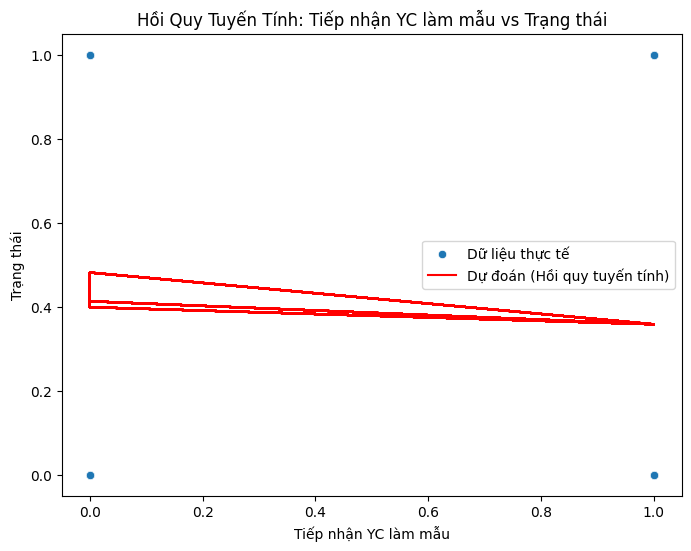

In [ ]:
# Chia dữ liệu thành các biến độc lập (X) và biến phụ thuộc (y)
y = df_gm1['Trạng thái']  # Biến phụ thuộc

X = pd.get_dummies(df_gm1[['Mùa']], columns=['Mùa'], drop_first=True)  # One-hot encoding

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Hiển thị hệ số hồi quy và intercept
print("Hệ số hồi quy (slope):", model.coef_)
print("Intercept:", model.intercept_)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Trực quan hóa kết quả
plt.figure(figsize=(8, 6))
# Assuming 'Tiếp nhận YC làm mẫu' is a numerical feature, replace 'Diện tích (m2)' with it

# Use one of the dummy variables created by pd.get_dummies for the x-axis
# For example, if you want to plot against 'Mùa_Thu':
sns.scatterplot(x=X_test['Mùa_Xuân'], y=y_test, label='Dữ liệu thực tế')

# Or, if you want to plot against 'Mùa_Xuân':
# sns.scatterplot(x=X_test['Mùa_Xuân'], y=y_test, label='Dữ liệu thực tế')

plt.plot(X_test['Mùa_Xuân'], y_pred, color='red', label='Dự đoán (Hồi quy tuyến tính)') # Also change here to match the x-axis
plt.title('Hồi Quy Tuyến Tính: Tiếp nhận YC làm mẫu vs Trạng thái')  # Changed title
plt.xlabel('Tiếp nhận YC làm mẫu')  # Changed x-axis label to reflect the chosen dummy variable
plt.ylabel('Trạng thái')  # Changed y-axis label
plt.legend()
plt.show()

Hệ số hồi quy (slope): [-0.07128229]
Intercept: 0.41311902693310165
Mean Squared Error (MSE): 0.23685591169435746
R-squared (R2): 0.0032766627280244043


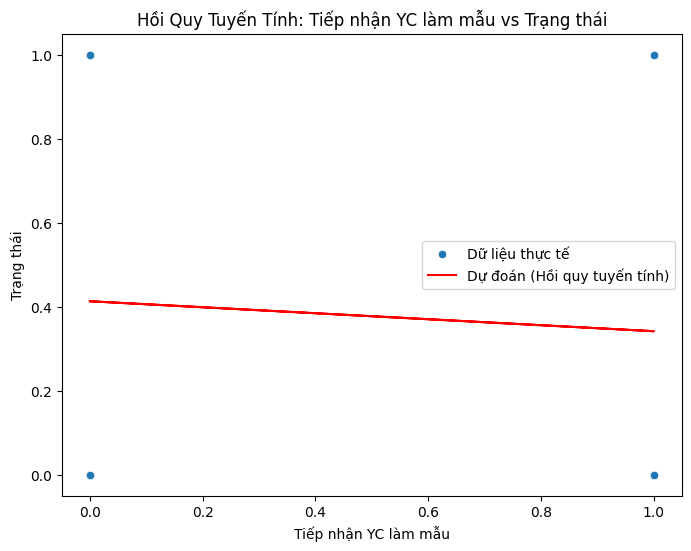

In [ ]:
# Chia dữ liệu thành các biến độc lập (X) và biến phụ thuộc (y)
X = df_gm1[['Tiếp nhận YC làm mẫu']] # Changed 'Tiếp nhận Yc làm mẫu' to 'Tiếp nhận YC làm mẫu'
y = df_gm1['Trạng thái']  # Biến phụ thuộc

# Chia dữ liệu thành dữ liệu huấn luyện và dữ liệu kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train, y_train)

# Dự đoán giá trị trên dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Hiển thị hệ số hồi quy và intercept
print("Hệ số hồi quy (slope):", model.coef_)
print("Intercept:", model.intercept_)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Trực quan hóa kết quả
plt.figure(figsize=(8, 6))
# Assuming 'Tiếp nhận YC làm mẫu' is a numerical feature, replace 'Diện tích (m2)' with it
sns.scatterplot(x=X_test['Tiếp nhận YC làm mẫu'], y=y_test, label='Dữ liệu thực tế')
plt.plot(X_test['Tiếp nhận YC làm mẫu'], y_pred, color='red', label='Dự đoán (Hồi quy tuyến tính)')
plt.title('Hồi Quy Tuyến Tính: Tiếp nhận YC làm mẫu vs Trạng thái')  # Changed title
plt.xlabel('Tiếp nhận YC làm mẫu')  # Changed x-axis label
plt.ylabel('Trạng thái')  # Changed y-axis label
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
pip install prophet

In [ ]:

df_gm1['Ngày tạo'] = pd.to_datetime(df_gm1['Ngày tạo'])
df_gm1.set_index('Ngày tạo', inplace=True)

# Kiểm tra chuỗi thời gian
print(df_gm1.head())


                    Mã đơn hàng  \
Ngày tạo                          
2024-08-09 11:01:55      S03031   
2024-09-10 09:19:19      S03261   
2024-09-10 09:20:40      S03262   
2024-09-10 09:08:08      S03260   
2024-09-10 08:18:11      S03259   

                                                               Khách hàng  \
Ngày tạo                                                                    
2024-08-09 11:01:55  THAGACO INTERNATIONAL INVESTMENT JOINT STOCK COMPANY   
2024-09-10 09:19:19                                           TMC LIMITED   
2024-09-10 09:20:40                                  MIAN APPAREL COMPANY   
2024-09-10 09:08:08                                CÔNG TY SCAVI BIÊN HÒA   
2024-09-10 08:18:11                                                  GMAA   

                           PD Ngày KH yêu cầu Nhân viên kinh doanh  \
Ngày tạo                                                             
2024-08-09 11:01:55  Victoria      2024-02-26                Hương   
2024

In [ ]:
#Chuỗi thời gian phải dừng để áp dụng ARIMA. Sử dụng kiểm định ADF (Augmented Dickey-Fuller):
#Xác định d
from statsmodels.tsa.stattools import adfuller

# Kiểm tra chuỗi ban đầu
result = adfuller(df_gm1['Tổng'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Nếu không dừng, lấy sai phân bậc 1
df_gm1['Tổng_diff'] = df_gm1['Tổng'].diff().dropna()

# Kiểm tra chuỗi sau khi lấy sai phân
result = adfuller(df_gm1['Tổng_diff'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -10.30168009228108
p-value: 3.3594628215810203e-18
ADF Statistic: -18.48527574039302
p-value: 2.1304773552454615e-30


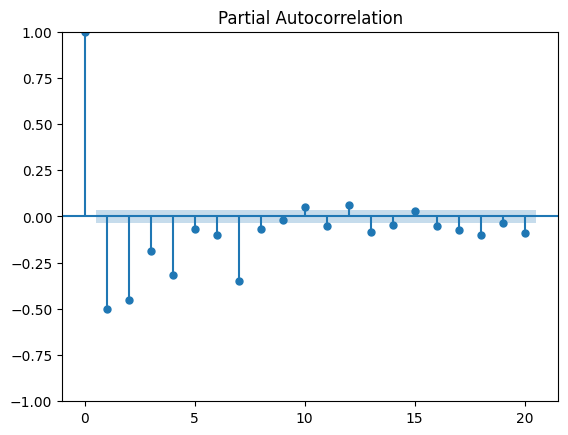

In [ ]:
#xác định P
from statsmodels.graphics.tsaplots import plot_pacf

# Vẽ đồ thị PACF
plot_pacf(df_gm1['Tổng_diff'].dropna(), lags=20)
plt.show()


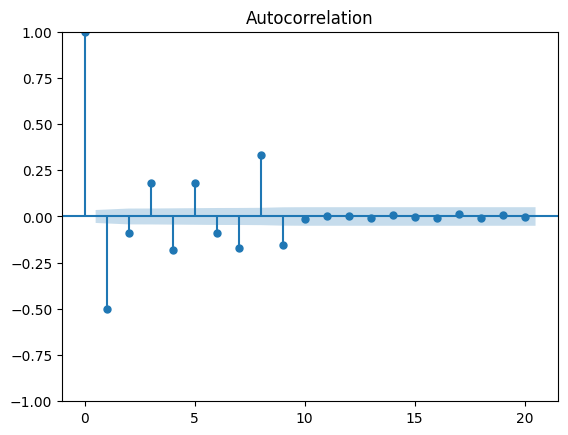

In [ ]:
#Xác định q
from statsmodels.graphics.tsaplots import plot_acf

# Vẽ đồ thị ACF
plot_acf(df_gm1['Tổng_diff'].dropna(), lags=20)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                   Tổng   No. Observations:                 3123
Model:               ARIMA(15, 2, 11)   Log Likelihood              -10056.909
Date:                Wed, 11 Dec 2024   AIC                          20167.819
Time:                        03:15:22   BIC                          20331.058
Sample:                             0   HQIC                         20226.418
                               - 3123                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.1060      1.039     -2.026      0.043      -4.143      -0.069
ar.L2         -3.1899      2.854     -1.118      0.264      -8.783       2.403
ar.L3         -4.1765      4.275     -0.977      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


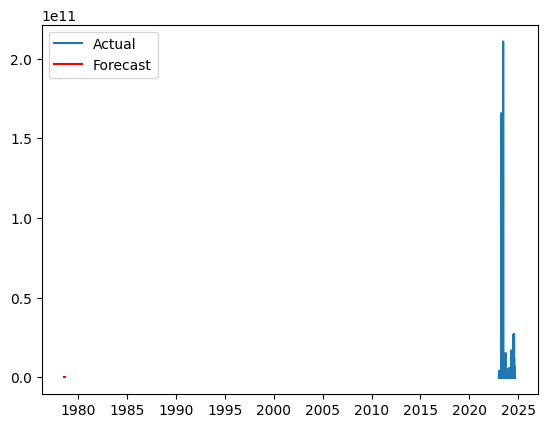

In [ ]:
# Xây dựng mô hình ARIMA
model = ARIMA(df_gm1['Tổng']/1e9, order=(15,2,11))  # Điều chỉnh (p, d, q)
model_fit = model.fit()

# Kết quả mô hình
print(model_fit.summary())

# Dự báo
forecast = model_fit.forecast(steps=30)  # Dự báo 30 ngày
plt.plot(df_gm1['Tổng'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()
#Dự báo có độ chính xác cao (AIC, BIC thấp, MAE và RMSE nhỏ).

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


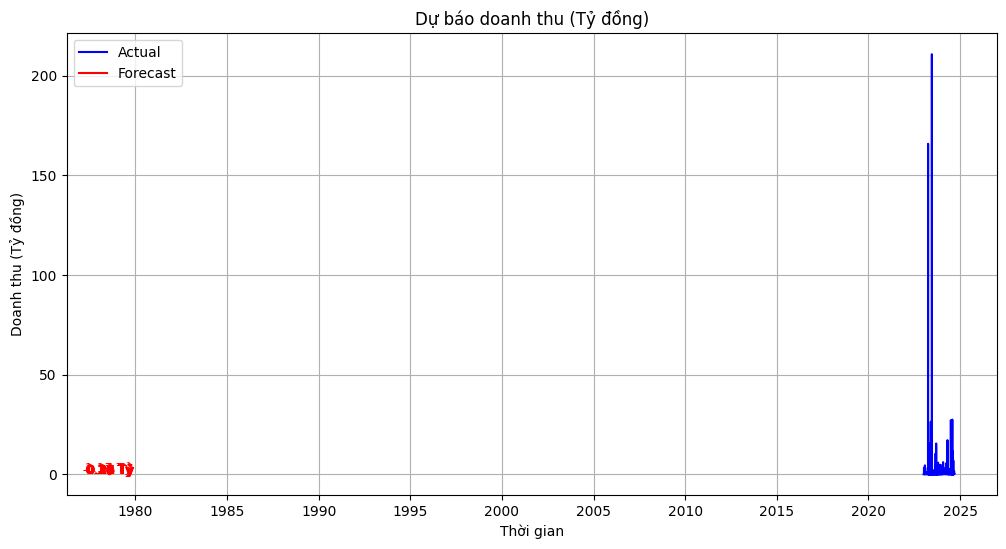

In [ ]:
import matplotlib.pyplot as plt

# Dự báo 30 ngày
forecast = model_fit.forecast(steps=30)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Giá trị thực tế
plt.plot(df_gm1['Tổng'] / 1e9, label='Actual', color='blue')

# Giá trị dự báo
forecast_index = range(len(df_gm1), len(df_gm1) + len(forecast))  # Chỉ số cho dữ liệu dự báo
plt.plot(forecast_index, forecast, label='Forecast', color='red')

# Thêm chú thích (giá trị) kèm "Tỷ đồng"
for i, value in enumerate(forecast):
    plt.text(forecast_index[i], value, f'{value:.2f} Tỷ', color='red', fontsize=9, ha='center')

# Tùy chỉnh đồ thị
plt.title("Dự báo doanh thu (Tỷ đồng)")
plt.xlabel("Thời gian")
plt.ylabel("Doanh thu (Tỷ đồng)")
plt.legend()
plt.grid(True)

# Hiển thị đồ thị
plt.show()



In [ ]:
from prophet import Prophet

# Đổi tên cột phù hợp với Prophet
df_prophet = df_gm1.reset_index()
df_prophet.rename(columns={'Ngày tạo': 'ds', 'Tổng': 'y'}, inplace=True)

# Khởi tạo mô hình Prophet
model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3wn40k7/cyesaw8y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3wn40k7/j_a9h_wk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29137', 'data', 'file=/tmp/tmpk3wn40k7/cyesaw8y.json', 'init=/tmp/tmpk3wn40k7/j_a9h_wk.json', 'output', 'file=/tmp/tmpk3wn40k7/prophet_modeluc0im4in/prophet_model-20241211031555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:15:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:15:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **4. Trực quan hóa dữ liệu (Data Visualization)**